# RBF Network

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import repeat
import random
from IPython.display import Image

## Utilities used for manipulation of data/matrices in the task

In [2]:
# Sampling of data points according to the given rule
def createSampleFeatures(): 
    xi = []
    xj = []
    for x in range(0, 21):
        xi.extend(repeat((-2 + (0.2*x)),21))
        xj.extend(repeat((-2 + (0.2*x)),21))
    random.shuffle(xi)
    random.shuffle(xj)
    x1 = np.array(xi)
    x2 = np.array(xj)
    return np.vstack((x1, x2)).T

In [3]:
 # Returns labels of each input according to the given rule
def calculateSampleTargetsGivenFeatures(data):
    y = []
    for feature in data:
        f = feature[0]**2 + feature[1]**2
        if f<=1:
            y.append(1)
        if f>1:
            y.append(-1)
    return np.array(y)        

In [4]:
# Returns g values of the of all nodes in the hidden layer, non linear transformation 
def calculateGaussianFunctionForAllNodes(inputMatrix, centres, spreadParam):
    g = []
    for centroid in centres: 
        g.append(calculateGaussianFunctionForOneNode(inputMatrix, 
                                                     centroid.reshape(centroid.shape[0], -1), 
                                                     spreadParam))
    return np.array(g)

In [5]:
# Returns g values of the of one node in the hidden layer, non linear transformation 
def calculateGaussianFunctionForOneNode(inputMatrix, centroid, spreadParam):
    input = inputMatrix.transpose()
    diff = input - centroid
    diffSquare = diff ** 2
    sumDiffSquare = np.sum(diffSquare, axis=0) * (-0.5/(spreadParam**2))
    expTerm = np.exp(sumDiffSquare).transpose()
    return expTerm

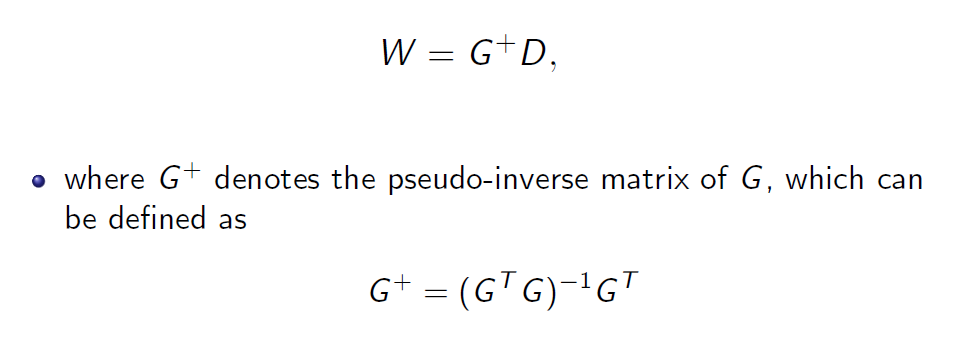

In [6]:
Image(filename='img/q3_3.png')

In [7]:
# Returns weights between hidden and output layer using inverse matrix calculation, above image states the formula
def calculateWOfOutputLayer(gMatrix, oMatrix):
    ggt = np.dot(gMatrix, gMatrix.transpose())
    ggt_i = np.linalg.pinv(ggt)
    gg_i_g = np.dot(ggt_i, gMatrix)
    gg_i_g_o = np.dot(gg_i_g, oMatrix)
    #print('ggt',ggt)
    #print('gg_i',ggt_i)
    #print('ggt * ggt_i', np.dot(ggt_i,ggt))
    #print('gg_i_g',gg_i_g.shape)
    return gg_i_g_o.transpose()

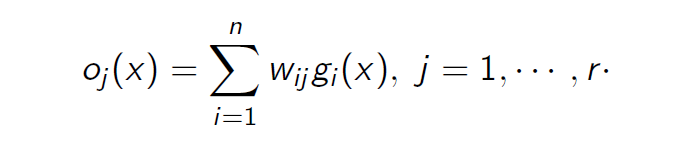

In [8]:
Image(filename='img/q3_4.png')

In [9]:
# W(t)G Returns the predicted output give weights and g values, above image states the formula
def calculateOutput(weights, g):
    return np.dot(weights, g).transpose()

In [10]:
# Displays scatter plot of generated sample
def showScatterPlot(features, outputs):
    outputs = outputs.reshape(outputs.shape[0],-1)
    mergedFeaturesOutputData = np.hstack((features,outputs))
    df = pd.DataFrame(mergedFeaturesOutputData, columns = ['X1','X2', 'Y'])
    sns.pairplot(df, hue='Y', height=5, aspect=1)

In [11]:
# Returns total error of all data samples given target(t) and output(O)
def errorCumulative(target, output):
    # sum of (-0.5 * (t-0)^2) of all outputs
    error = np.sum(np.sum((0.5) * ((target - output) * (target - output)), 
                          dtype=np.float64, axis=1), dtype=np.float64, axis=0)
    return error

In [12]:
# Generates n unique samples from a given dataset
def generateRandomNSamples(dataset, n):
    row_idx = np.array(random.sample(range(0, dataset.shape[0]), n))
    return dataset[row_idx]

In [13]:
# predicts the output given sample of inputs and parameters of a trained network
def predict(inputMatrix, targets, centers, spreadParam, weights):
    g = calculateGaussianFunctionForAllNodes(inputMatrix=inputMatrix, 
                                             centres=centers, 
                                             spreadParam=spreadParam)
    predictedOutput = calculateOutput(weights=weights, g=g)
    return showPerformanceOfModel(target = targets, predicted = predictedOutput)

In [14]:
# Returns labels of prediction value 1 or -1  
def generateLabelsOfPrediction(predictions):
    labels = []
    for prediction in predictions: 
        if prediction > 1:
            labels.append([1])
        else:
            labels.append([-1])
    return np.array(labels)

In [15]:
# Returns accuracy given target(t) and output(O)
def calculateAccuracy(t, O):
    correctPreds = np.sum((t == O).all(1))
    accuracy = (correctPreds / (t.shape[0]))
    return accuracy

In [16]:
# Displays performance metrics of the model on give dataset
def showPerformanceOfModel(target, predicted):
    accuracy = calculateAccuracy(trainY, 
                                 generateLabelsOfPrediction(predicted))*100
    print('Accuracy of model', accuracy)
    print('Cummulative mean square error', 
          (errorCumulative(target=testY, output=predicted)/target.shape[0]))
    return accuracy

In [17]:
# Plot model performance
def plotModelPerformance(trainAccuracies, testAccuracies, spreadParams):
    plt.figure(figsize=(8,8))
    plt.plot(spreadParams, trainAccuracies, label = "Training data")
    plt.plot(spreadParams, testAccuracies, label = "Test data")
    plt.legend()
    plt.xlabel("Spread params")
    plt.ylabel("Accuracy")
    plt.show()

## Two features x1 and x2. Given below is the data generation policy for training process.

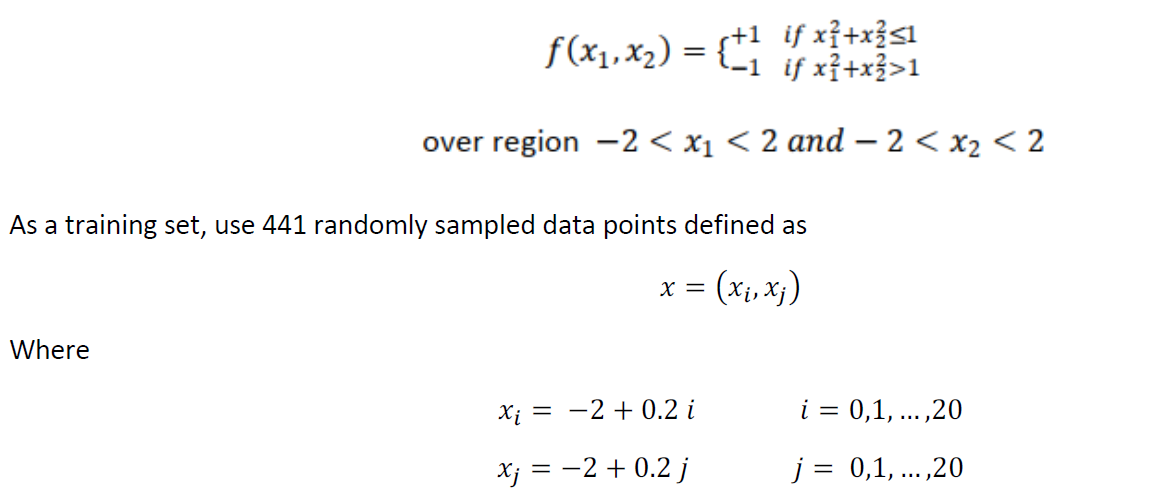

In [18]:
Image(filename='img/q3_1.png')

## Creating data samples

In [19]:
globalFeatures = createSampleFeatures()
globalOutputs = calculateSampleTargetsGivenFeatures(globalFeatures)

## Visualizing 441 randomly sampled datapoints

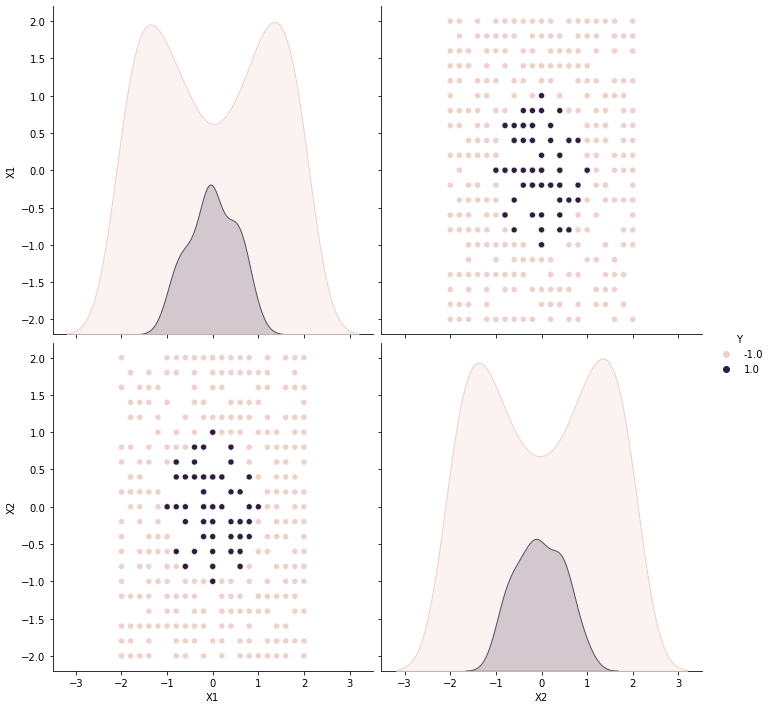

In [20]:
showScatterPlot(globalFeatures, globalOutputs)

## Splitting Train and Test sets (80% Train, 20% Test)

In [21]:
trainX = globalFeatures[:352, :]
trainY = globalOutputs[:352]
trainY = trainY.reshape(trainY.shape[0],-1)

testX = globalFeatures[89:, :]
testY = globalOutputs[89:]
testY = testY.reshape(testY.shape[0],-1)

### Calculating G values of hidden layer

#### Train Method for RBF network

In [22]:
def trainRBFNetwork(spreadParam, centres):
    hiddenG = calculateGaussianFunctionForAllNodes(trainX, 
                                                   centres=centres, 
                                                   spreadParam=spreadParam)
    #print('Hidden G values after non linear transformation', hiddenG.shape)
    w = calculateWOfOutputLayer(hiddenG, trainY)
    #print('Final weights calculated using matrix inversion technique', w)
    return w

## Performance analysis

## [1]
### 1. Using Gaussian kernel functions
### 2. Spread parameter is same for all kernel functions
### 3. Considering all the data points as the centers of the RB functions

#### Case study: Using spread param = 0.5

In [24]:
width = 0.2
trainAccuracies = []
testAccuracies = []
spreadParams = []
networkWeights  = trainRBFNetwork(spreadParam=width, centres = trainX)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(
    predict(trainX, trainY, centers=trainX, spreadParam=width, 
            weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 95.45454545454545
Cummulative mean square error 0.5284090909090943

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 78.4090909090909
Cummulative mean square error 0.00906728865769017


#### Case study: Using spread param = 0.7

In [25]:
width = 0.7
networkWeights  = trainRBFNetwork(spreadParam=width, centres = trainX)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 91.76136363636364
Cummulative mean square error 0.4879289649454822

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 80.68181818181817
Cummulative mean square error 0.03956360599067274


#### Case study: Using spread param = 0.9

In [26]:
width = 0.9
networkWeights  = trainRBFNetwork(spreadParam=width, centres = trainX)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 91.76136363636364
Cummulative mean square error 0.4775680197733197

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 80.11363636363636
Cummulative mean square error 0.042921065678687344


#### Case study: Using spread param = 1

In [27]:
width = 1
networkWeights  = trainRBFNetwork(spreadParam=width, centres = trainX)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 91.47727272727273
Cummulative mean square error 0.47833386712012377

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 80.11363636363636
Cummulative mean square error 0.04521893512093031


#### Case study: Using spread param = 5

In [28]:
width = 5
networkWeights  = trainRBFNetwork(spreadParam=width, centres = trainX)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.42003809407355663

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.1027068927411142


#### Case study: Using spread param = 10

In [29]:
width = 10
networkWeights  = trainRBFNetwork(spreadParam=width, centres = trainX)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=trainX, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.35832159234349065

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.17819241437964617


### Behaviour of model with increase of spread param in train and test sets

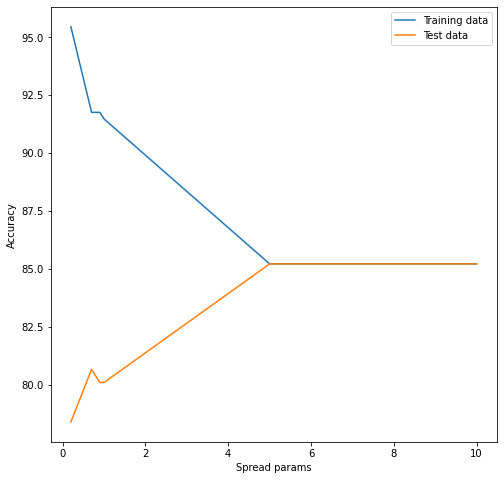

In [30]:
plotModelPerformance(trainAccuracies=trainAccuracies, 
                     testAccuracies=testAccuracies,
                     spreadParams=spreadParams)

## [2a]
### 1. Using Gaussian kernel functions
### 2. Spread parameter is same for all kernel functions
### 3. Considering 150 randomly picked data points as the centers of the RB functions

In [32]:
clusterCenters = generateRandomNSamples(trainX, n=150) # generating 150 random samples of center from training set 

#### Case study: Using spread param = 0.1

In [33]:
width = 0.1
trainAccuracies = []
testAccuracies = []
spreadParams = []
networkWeights  = trainRBFNetwork(spreadParam=width, 
                                  centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, spreadParam=width, 
        weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 90.625
Cummulative mean square error 0.4751365874958686

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 81.5340909090909
Cummulative mean square error 0.181101393874726


#### Case study: Using spread param = 0.3

In [34]:
width = 0.3
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 90.9090909090909
Cummulative mean square error 0.4837486533525857

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 81.5340909090909
Cummulative mean square error 0.034222911492273786


#### Case study: Using spread param = 0.5

In [35]:
width = 0.5
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 91.47727272727273
Cummulative mean square error 0.4853165227286292

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 80.68181818181817
Cummulative mean square error 0.034802669623049017


#### Case study: Using spread param = 0.8

In [36]:
width = 0.8
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 91.76136363636364
Cummulative mean square error 0.47717614652717927

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 80.11363636363636
Cummulative mean square error 0.04233647398007102


#### Case study: Using spread param = 1

In [37]:
width = 1
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 92.32954545454545
Cummulative mean square error 0.4760350816330556

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 79.26136363636364
Cummulative mean square error 0.046126328724813766


#### Case study: Using spread param = 2

In [38]:
width = 2
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 89.77272727272727
Cummulative mean square error 0.45532388369676435

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 81.5340909090909
Cummulative mean square error 0.06547447078312532


#### Case study: Using spread param = 5

In [39]:
width = 5
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.4198934306737813

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.10268214871575684


#### Case study: Using spread param = 10

In [40]:
width = 10
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.3583156561192663

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.17819300769123253


### Behaviour of model with increase of spread param in train and test sets

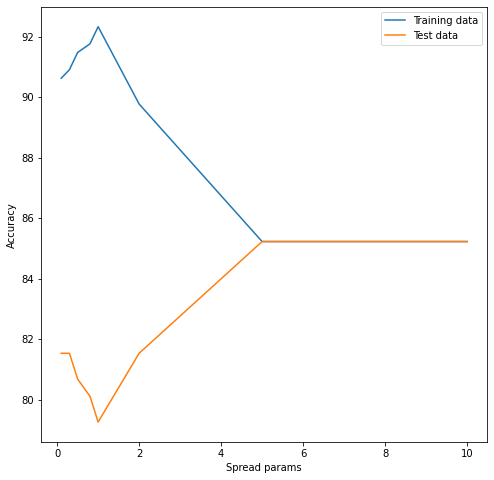

In [41]:
plotModelPerformance(trainAccuracies=trainAccuracies, 
                     testAccuracies=testAccuracies,
                     spreadParams=spreadParams)

## [2b]
### 1. Using Gaussian kernel functions
### 2. Spread parameter is same for all kernel functions
### 3. Considering 150 data points as the centers from K-means clustering algorithm

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(n_clusters=150, random_state=0).fit(trainX)
clusterCenters = kmeans.cluster_centers_

#### Case study: Using spread param = 0.1

In [45]:
width = 0.1
trainAccuracies = []
testAccuracies = []
spreadParams = []
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 92.89772727272727
Cummulative mean square error 0.500661650224841

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 80.9659090909091
Cummulative mean square error 0.08278602445802938


#### Case study: Using spread param = 0.3

In [46]:
width = 0.3
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 90.625
Cummulative mean square error 0.49786142900410774

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 81.81818181818183
Cummulative mean square error 0.027355780334170122


#### Case study: Using spread param = 0.5

In [47]:
width = 0.5
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 91.19318181818183
Cummulative mean square error 0.4925999714513436

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 80.68181818181817
Cummulative mean square error 0.030450815840545268


#### Case study: Using spread param = 1

In [48]:
width = 1
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 92.32954545454545
Cummulative mean square error 0.4764772848778543

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 79.82954545454545
Cummulative mean square error 0.04565299163418663


#### Case study: Using spread param = 5

In [49]:
width = 5
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.42000175738907797

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.1027067887097561


#### Case study: Using spread param = 10

In [50]:
width = 10
networkWeights  = trainRBFNetwork(spreadParam=width, centres = clusterCenters)
print('Performance report on training set \n ---------------------------------------------')
trainAccuracies.append(predict(trainX, trainY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
print('\n....................\nPerformance report on test set \n ---------------------------------------------')
testAccuracies.append(predict(testX, testY, centers=clusterCenters, 
        spreadParam=width, weights=networkWeights))
spreadParams.append(width)

Performance report on training set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.358326371657712

....................
Performance report on test set 
 ---------------------------------------------
Accuracy of model 85.22727272727273
Cummulative mean square error 0.17819308800385728


### Behaviour of model with increase of spread param in train and test sets

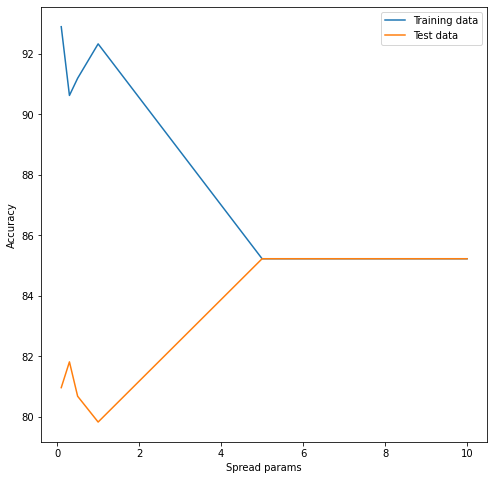

In [51]:
plotModelPerformance(trainAccuracies=trainAccuracies, 
                     testAccuracies=testAccuracies,
                     spreadParams=spreadParams)

# Takeaway

## 1. When the spread parameter is less in the range of 0-4, 
##    the model fails to give a proper interpolation for the unseen data, 
##    hence giving better accuracy for train set over test set.

## 2. A spread value above 5 gives a better result